<a href="https://colab.research.google.com/github/Mohammad-Amirifard/ClimateFish_Analysis/blob/main/Part2_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MTAFFI 2023 - Assignment

In this notebook, we are making our best effort to do specific anlaysis on ClimateFish dataset.

**Problem:** Do scientific analysis on ClimateFish Dataset

**Note1:** This notebook has been writen in [Google Colab platform](https://colab.research.google.com/). So, if you want to run it in other platforms, you should install mentioned packages inside this note.

**Note2:** By this [Link](https://drive.google.com/drive/u/0/folders/1g6m-xV1QAFCAi8lW2z30zJxLqd22wdHN), you can find all materiasl such as artciles, dataset and so on which are needed for this problem.

### 1-Import Datasets

####1-1 Mount Google Drive to colab to access your dataset

In [ ]:
from google.colab import drive
# mount google drive to /content directory. You can see your drive on the left pannel.
drive.mount('/content/drive')

Mounted at /content/drive


####1-2 Copy you datasets to the /content direcory of google colab

In [ ]:
# Here, /content/drive/MyDrive/Projects/ClimateFish/Dataset/clean_dataset.csv is the address of dataset in my drive. You must replace it with yours.
!cp  "/content/drive/MyDrive/Projects/ClimateFish/Dataset/clean_dataset.csv" "/content"

cp: cannot stat '/content/drive/MyDrive/Projects/ClimateFish/Dataset/clean_dataset.csv': No such file or directory


### 2-Import  Libraries

In [ ]:
# To use dataframes whem we are dealing with files like csv files
import pandas as pd
# To plot graphs
from matplotlib import pyplot as plt
# To use matrixes benefits
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.cluster import KMeans

### 3-Load dataset and its description from csv files

In [ ]:
dataset = pd.read_csv("/content/clean_dataset.csv")
second_dataset = dataset.copy()

In [ ]:
1# Let's Look at dataset
print("\n")
print("*"*90,end='')
print(" Our clean ClimateFish Dataset ",end="*"*190)
# Show 10 first lines of dataset
dataset.head(10)



****************************************************************************************** Our clean ClimateFish Dataset **********************************************************************************************************************************************************************************************

,Record_ID,Year,Month,Day,Decimal_latitude,Decimal_longitude,Country,Location,Depth,Replicate,...,Siganus_luridus,Siganus_rivulatus,Sarpa_salpa,Serranus_scriba,Thalassoma_pavo,Pterois_miles,Stephanolopis_diaspros,Parupeneus_forskali,Pempheris_rhomboidea,Torquigener_flavimaculosus
0,1,2009,9,17.0,41.670930,9.385530,FR,Capu di Fora,1_3,1,...,0.0,0.0,2.0,5.0,4.0,0.0,0.0,0.0,0.0,0.0
1,9,2009,9,18.0,41.689400,9.392622,FR,La Vardiola,1_3,1,...,0.0,0.0,24.0,5.0,7.0,0.0,0.0,0.0,0.0,0.0
2,17,2009,9,18.0,41.640919,9.372925,FR,Punta Arasu,1_3,1,...,0.0,0.0,8.0,2.0,8.0,0.0,0.0,0.0,0.0,0.0
3,25,2009,9,NaN,35.864130,12.882499,IT,Faraglioni di Linosa,1_3,1,...,0.0,0.0,11.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0
4,29,2009,9,NaN,35.875110,12.864366,IT,Mannarazza,1_3,2,...,0.0,0.0,13.0,1.0,35.0,0.0,0.0,0.0,0.0,0.0
5,32,2009,9,NaN,35.862072,12.852900,IT,Pozzolana,1_3,1,...,0.0,0.0,12.0,1.0,34.0,0.0,0.0,0.0,0.0,0.0
6,37,2009,9,NaN,38.269900,15.225400,IT,SW Capo Milazzo,1_3,1,...,0.0,0.0,14.0,5.0,16.0,0.0,0.0,0.0,0.0,0.0
7,41,2009,9,NaN,38.267900,15.225300,IT,W Capo Milazzo,1_3,1,...,0.0,0.0,14.0,7.0,32.0,0.0,0.0,0.0,0.0,0.0
8,45,2009,10,NaN,42.233000,3.221600,ES,Coralli lor,1_3,1,...,0.0,0.0,46.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9,49,2009,10,NaN,42.239200,3.266300,ES,Mont Joy,1_3,1,...,0.0,0.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 901 entries, 0 to 900
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Record_ID                   901 non-null    int64  
 1   Year                        901 non-null    int64  
 2   Month                       901 non-null    int64  
 3   Day                         807 non-null    float64
 4   Decimal_latitude            901 non-null    float64
 5   Decimal_longitude           901 non-null    float64
 6   Country                     901 non-null    object 
 7   Location                    901 non-null    object 
 8   Depth                       901 non-null    object 
 9   Replicate                   901 non-null    int64  
 10  Coris_julis                 901 non-null    float64
 11  Epinephelus_marginatus      901 non-null    float64
 12  Fistularia_commersonii      901 non-null    float64
 13  Serranus_cabrilla           901 non

###4_Label Encoding

In [ ]:
# As you can see we need to use label encoding here. We need to encode culomns which are objects
lable_encoder = preprocessing.LabelEncoder()
dataset[['Country','Location','Depth']] = dataset[['Country','Location','Depth']].apply(lable_encoder.fit_transform)
columns_list_to_remove=['Stephanolopis_diaspros','Pempheris_rhomboidea']
dataset.drop(labels=columns_list_to_remove,inplace=True,axis=1)
dataset

,Record_ID,Year,Month,Day,Decimal_latitude,Decimal_longitude,Country,Location,Depth,Replicate,...,Serranus_cabrilla,Sparisoma_cretense,Siganus_luridus,Siganus_rivulatus,Sarpa_salpa,Serranus_scriba,Thalassoma_pavo,Pterois_miles,Parupeneus_forskali,Torquigener_flavimaculosus
0,1,2009,9,17.0,41.670930,9.385530,2,12,1,1,...,0.0,0.0,0.0,0.0,2.0,5.0,4.0,0.0,0.0,0.0
1,9,2009,9,18.0,41.689400,9.392622,2,42,1,1,...,0.0,0.0,0.0,0.0,24.0,5.0,7.0,0.0,0.0,0.0
2,17,2009,9,18.0,41.640919,9.372925,2,72,1,1,...,0.0,0.0,0.0,0.0,8.0,2.0,8.0,0.0,0.0,0.0
3,25,2009,9,NaN,35.864130,12.882499,5,24,1,1,...,0.0,15.0,0.0,0.0,11.0,2.0,34.0,0.0,0.0,0.0
4,29,2009,9,NaN,35.875110,12.864366,5,49,1,2,...,0.0,15.0,0.0,0.0,13.0,1.0,35.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
896,3123,2021,9,23.0,43.198300,5.228500,2,63,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
897,3127,2021,9,23.0,43.198300,5.228500,2,63,3,1,...,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
898,3131,2021,9,21.0,43.187690,5.556000,2,93,0,1,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
899,3135,2021,9,21.0,43.187690,5.556000,2,93,3,1,...,1.0,0.0,0.0,0.0,88.0,1.0,0.0,0.0,0.0,0.0


###5_Correlation Matrix

<Axes: >

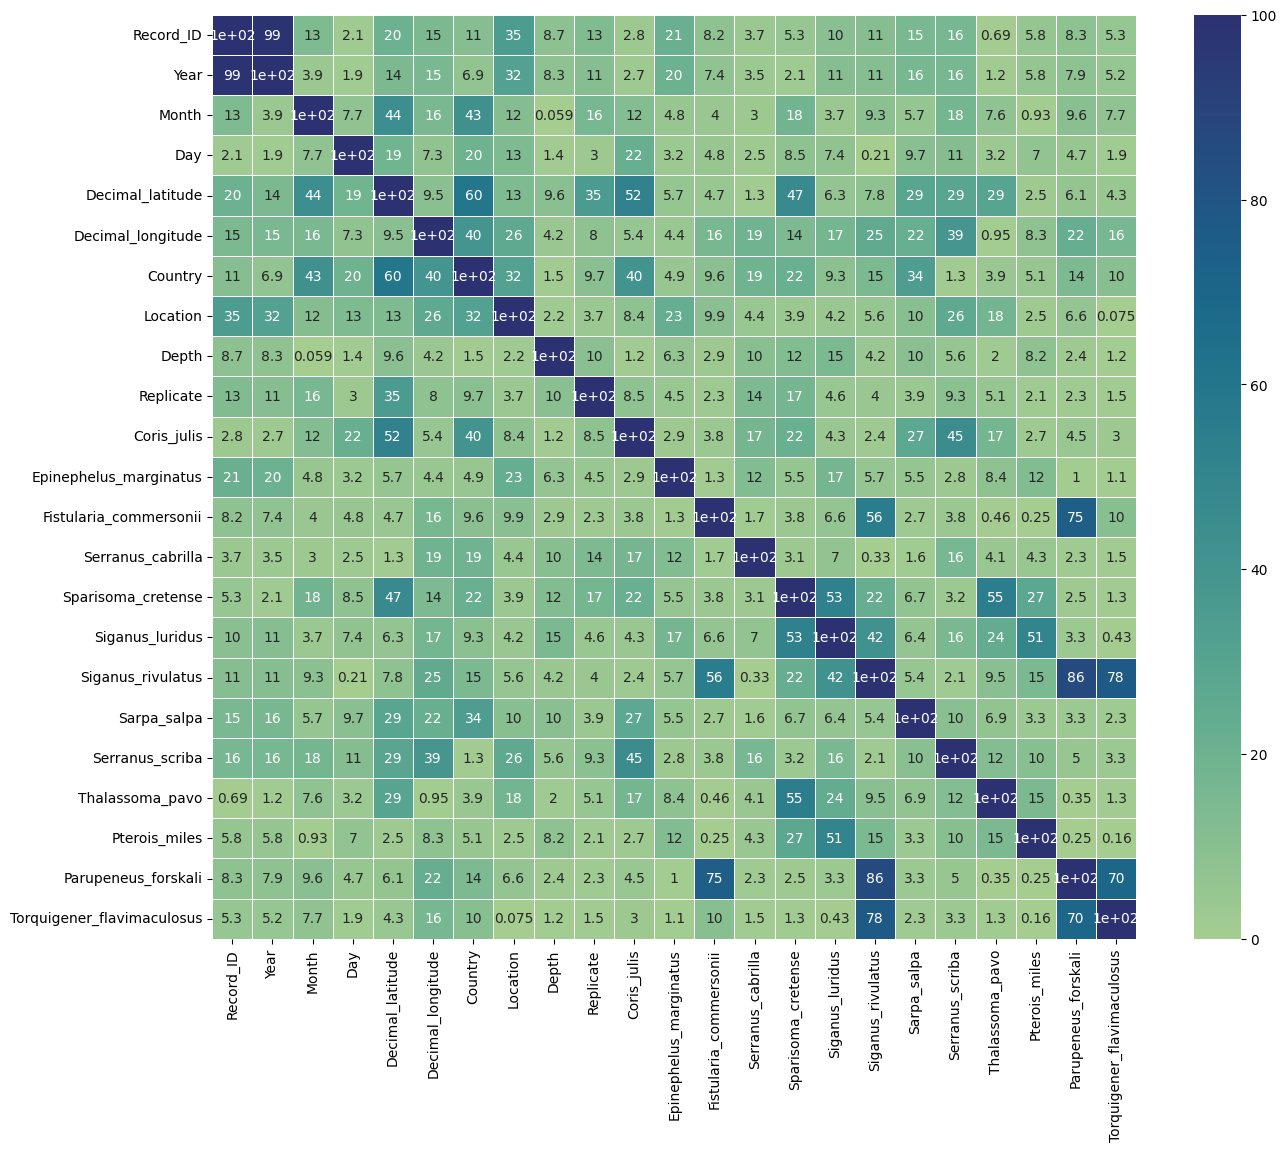

In [ ]:
# We need to know the effect of features on each other and on the traget
f, ax = plt.subplots(figsize=(15, 12))
corr = dataset.corr()
sns.heatmap((corr.abs() * 100),annot=True,linewidth=.5,
            cmap='crest',
            square=True, ax=ax, vmin=0, vmax=100)

In [ ]:
# Four fist features which have the most effect on countries
country_correlations = corr['Country'].abs().sort_values(ascending=False)
country_correlations = country_correlations[[1,3,4,5]]
country_correlations

Decimal_latitude     0.595611
Coris_julis          0.404750
Decimal_longitude    0.401449
Sarpa_salpa          0.344187
Name: Country, dtype: float64

In [ ]:
country_correlations_names = country_correlations.index
country_correlations_names

Index(['Decimal_latitude', 'Coris_julis', 'Decimal_longitude', 'Sarpa_salpa'], dtype='object')

###6_ Clustering

finding Elbow point

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

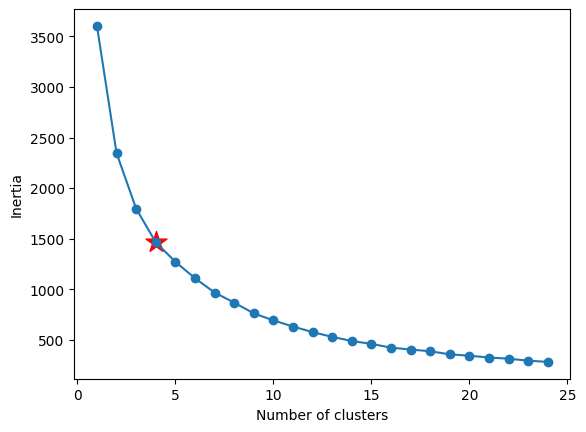

In [ ]:
selected_features = dataset[country_correlations_names]

scaler = StandardScaler()
data_standardized = scaler.fit_transform(selected_features)


inertia = []
for i in np.arange(1, 25):
    km = KMeans(
        n_clusters=i
    )
    km.fit(data_standardized)
    inertia.append(km.inertia_)

# plot

plt.plot(np.arange(1, 25), inertia, marker='o')
plt.scatter(4,inertia[3],color='red',marker="*", s = 250)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(data_standardized)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [ ]:
dataset['Cluster'] = kmeans.labels_
dataset

,Record_ID,Year,Month,Day,Decimal_latitude,Decimal_longitude,Country,Location,Depth,Replicate,...,Sparisoma_cretense,Siganus_luridus,Siganus_rivulatus,Sarpa_salpa,Serranus_scriba,Thalassoma_pavo,Pterois_miles,Parupeneus_forskali,Torquigener_flavimaculosus,Cluster
0,1,2009,9,17.0,41.670930,9.385530,2,12,1,1,...,0.0,0.0,0.0,2.0,5.0,4.0,0.0,0.0,0.0,0
1,9,2009,9,18.0,41.689400,9.392622,2,42,1,1,...,0.0,0.0,0.0,24.0,5.0,7.0,0.0,0.0,0.0,0
2,17,2009,9,18.0,41.640919,9.372925,2,72,1,1,...,0.0,0.0,0.0,8.0,2.0,8.0,0.0,0.0,0.0,0
3,25,2009,9,NaN,35.864130,12.882499,5,24,1,1,...,15.0,0.0,0.0,11.0,2.0,34.0,0.0,0.0,0.0,1
4,29,2009,9,NaN,35.875110,12.864366,5,49,1,2,...,15.0,0.0,0.0,13.0,1.0,35.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
896,3123,2021,9,23.0,43.198300,5.228500,2,63,0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3
897,3127,2021,9,23.0,43.198300,5.228500,2,63,3,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2
898,3131,2021,9,21.0,43.187690,5.556000,2,93,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
899,3135,2021,9,21.0,43.187690,5.556000,2,93,3,1,...,0.0,0.0,0.0,88.0,1.0,0.0,0.0,0.0,0.0,2


###Similarity in countries

In [ ]:
for i in range(4):
  print('Cluster:',i)
  print(np.unique(dataset[dataset['Cluster']==i]['Country'],return_counts=True))

Cluster: 0
(array([2, 4, 5]), array([ 16, 121,  32]))
Cluster: 1
(array([0, 3, 5, 6, 7]), array([  2,  28, 138, 305,  24]))
Cluster: 2
(array([1, 2, 5]), array([74,  4,  9]))
Cluster: 3
(array([2, 3, 4, 5]), array([  2,   3, 126,  17]))


In [ ]:
table = {'Cluster 0':['FR'],'Cluster 1':['IT,GR,MT,TN,CY'],'Cluster 2':['ES'],'Cluster 3':['HR']}
country_table = pd.DataFrame(table,index=['Country_Name'])
country_table

,Cluster 0,Cluster 1,Cluster 2,Cluster 3
Country_Name,FR,"IT,GR,MT,TN,CY",ES,HR


###Descriptive Statistics:

In [ ]:
# Calculate mean for each cluster
cluster_means = dataset.iloc[:,10:].groupby('Cluster').mean()
cluster_means

,Coris_julis,Epinephelus_marginatus,Fistularia_commersonii,Serranus_cabrilla,Sparisoma_cretense,Siganus_luridus,Siganus_rivulatus,Sarpa_salpa,Serranus_scriba,Thalassoma_pavo,Pterois_miles,Parupeneus_forskali,Torquigener_flavimaculosus
Cluster,,,,,,,,,,,,,
0,8.934911,0.171598,0.000000,0.248521,0.000000,0.000000,0.000000,4.343195,3.840237,0.982249,0.000000,0.000000,0.000000
1,4.102616,0.356137,0.030181,0.505030,4.028169,0.810865,0.243461,6.927565,2.758551,5.762575,0.028169,0.018109,0.002012
2,15.310345,0.126437,0.000000,1.586207,0.080460,0.000000,0.000000,35.057471,0.839080,1.885057,0.000000,0.000000,0.000000
3,24.628378,0.148649,0.000000,0.337838,0.000000,0.000000,0.000000,28.885135,8.763514,0.709459,0.000000,0.000000,0.000000


In [ ]:
p_value_table = pd.DataFrame({})

In [ ]:
from scipy.stats import ttest_ind
for i in range(4):
  for j in range(4):
    cluster_A = dataset[dataset['Cluster'] == i]['Coris_julis']
    cluster_B = dataset[dataset['Cluster'] == j]['Coris_julis']
    t_stat, p_value = ttest_ind(cluster_A, cluster_B)
    if 0.05<p_value <1:
      p_value_table.loc[f'cluster{i}',f'cluster{j}']= '>0.05'
    elif p_value<0.05:
      p_value_table.loc[f'cluster{i}',f'cluster{j}']= '<0.05'
    else:
      p_value_table.loc[f'cluster{i}',f'cluster{j}']= '---'

p_value_table

,cluster0,cluster1,cluster2,cluster3
cluster0,---,<0.05,<0.05,<0.05
cluster1,<0.05,---,<0.05,<0.05
cluster2,<0.05,<0.05,---,<0.05
cluster3,<0.05,<0.05,<0.05,---


In [ ]:
from scipy.stats import ttest_ind
for i in range(4):
  for j in range(4):
    cluster_A = dataset[dataset['Cluster'] == i]['Decimal_longitude']
    cluster_B = dataset[dataset['Cluster'] == j]['Decimal_longitude']
    t_stat, p_value = ttest_ind(cluster_A, cluster_B)
    if 0.05<p_value <1:
      p_value_table.loc[f'cluster{i}',f'cluster{j}']= '>0.05'
    elif p_value<0.05:
      p_value_table.loc[f'cluster{i}',f'cluster{j}']= '<0.05'
    else:
      p_value_table.loc[f'cluster{i}',f'cluster{j}']= '---'

p_value_table

,cluster0,cluster1,cluster2,cluster3
cluster0,---,<0.05,<0.05,<0.05
cluster1,<0.05,---,<0.05,<0.05
cluster2,<0.05,<0.05,---,<0.05
cluster3,<0.05,<0.05,<0.05,---
